# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [268]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

!pip install numpy==1.26.4 pandas==2.2.2 seaborn==0.13.2 matplotlib==3.10.0 Pillow==11.1.0 tensorflow==2.18.0 keras==3.8.0 scikit-learn==1.6.1

In [269]:
# Import essential libraries
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Load the dataset.

In [271]:
# Load and unzip the dataset
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\Star\Desktop\AI_ML_TestData\Assignments\CNN")

In [272]:
import os
for root, dirs, files in os.walk(r"C:\Users\Star\Desktop\AI_ML_TestData\Assignments\CNN\data"):
    level = root.replace(r"C:\Users\Star\Desktop\AI_ML_TestData\Assignments\CNN\data", '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

data/
    Cardboard/
        file_1.png
        file_10.png
        file_100.png
        file_101.png
        file_102.png
        file_103.png
        file_104.png
        file_105.png
        file_106.png
        file_107.png
        file_108.png
        file_109.png
        file_11.png
        file_110.png
        file_111.png
        file_112.png
        file_113.png
        file_114.png
        file_115.png
        file_116.png
        file_117.png
        file_118.png
        file_119.png
        file_12.png
        file_120.png
        file_121.png
        file_122.png
        file_123.png
        file_124.png
        file_125.png
        file_126.png
        file_127.png
        file_128.png
        file_129.png
        file_13.png
        file_130.png
        file_131.png
        file_132.png
        file_133.png
        file_134.png
        file_135.png
        file_136.png
        file_137.png
        file_138.png
        file_139.png
        file_14.png
        file_140.png

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [277]:
# Create a function to load the raw images
def load_raw_images(dataset_dir, image_size=(224, 224)):
    X = []
    y = []
    class_names = sorted(os.listdir(dataset_dir))
    label_map = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            try:
                img = Image.open(file_path).convert("RGB")
                img = img.resize(image_size)
                X.append(np.array(img))
                y.append(label_map[class_name])
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    X = np.array(X)
    y = np.array(y)
    return X, y, class_names

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [280]:
# Get the images and their labels
dataset_dir = r"C:\Users\Star\Desktop\AI_ML_TestData\Assignments\CNN\data"
X, y, class_names = load_raw_images(dataset_dir)

In [281]:
print(f"Loaded {len(X)} images with shape {X[0].shape}")
print("Classes:", class_names)

Loaded 7625 images with shape (224, 224, 3)
Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

C:\Users\Star\AppData\Local\Temp\ipykernel_8628\2232674691.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_counts, palette='viridis')


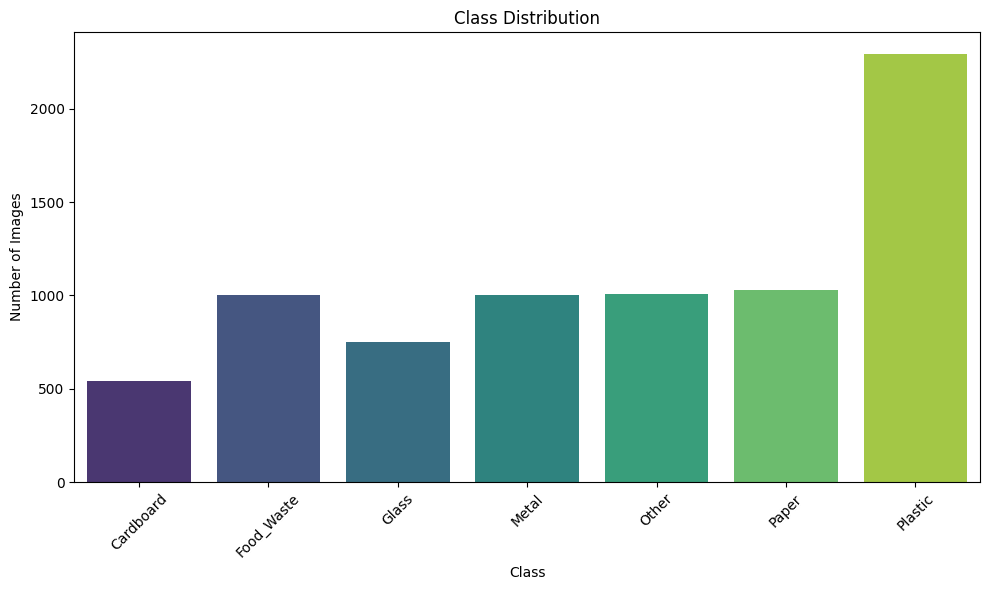

In [285]:
# Visualise Data Distribution

class_counts = np.bincount(y)
    
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

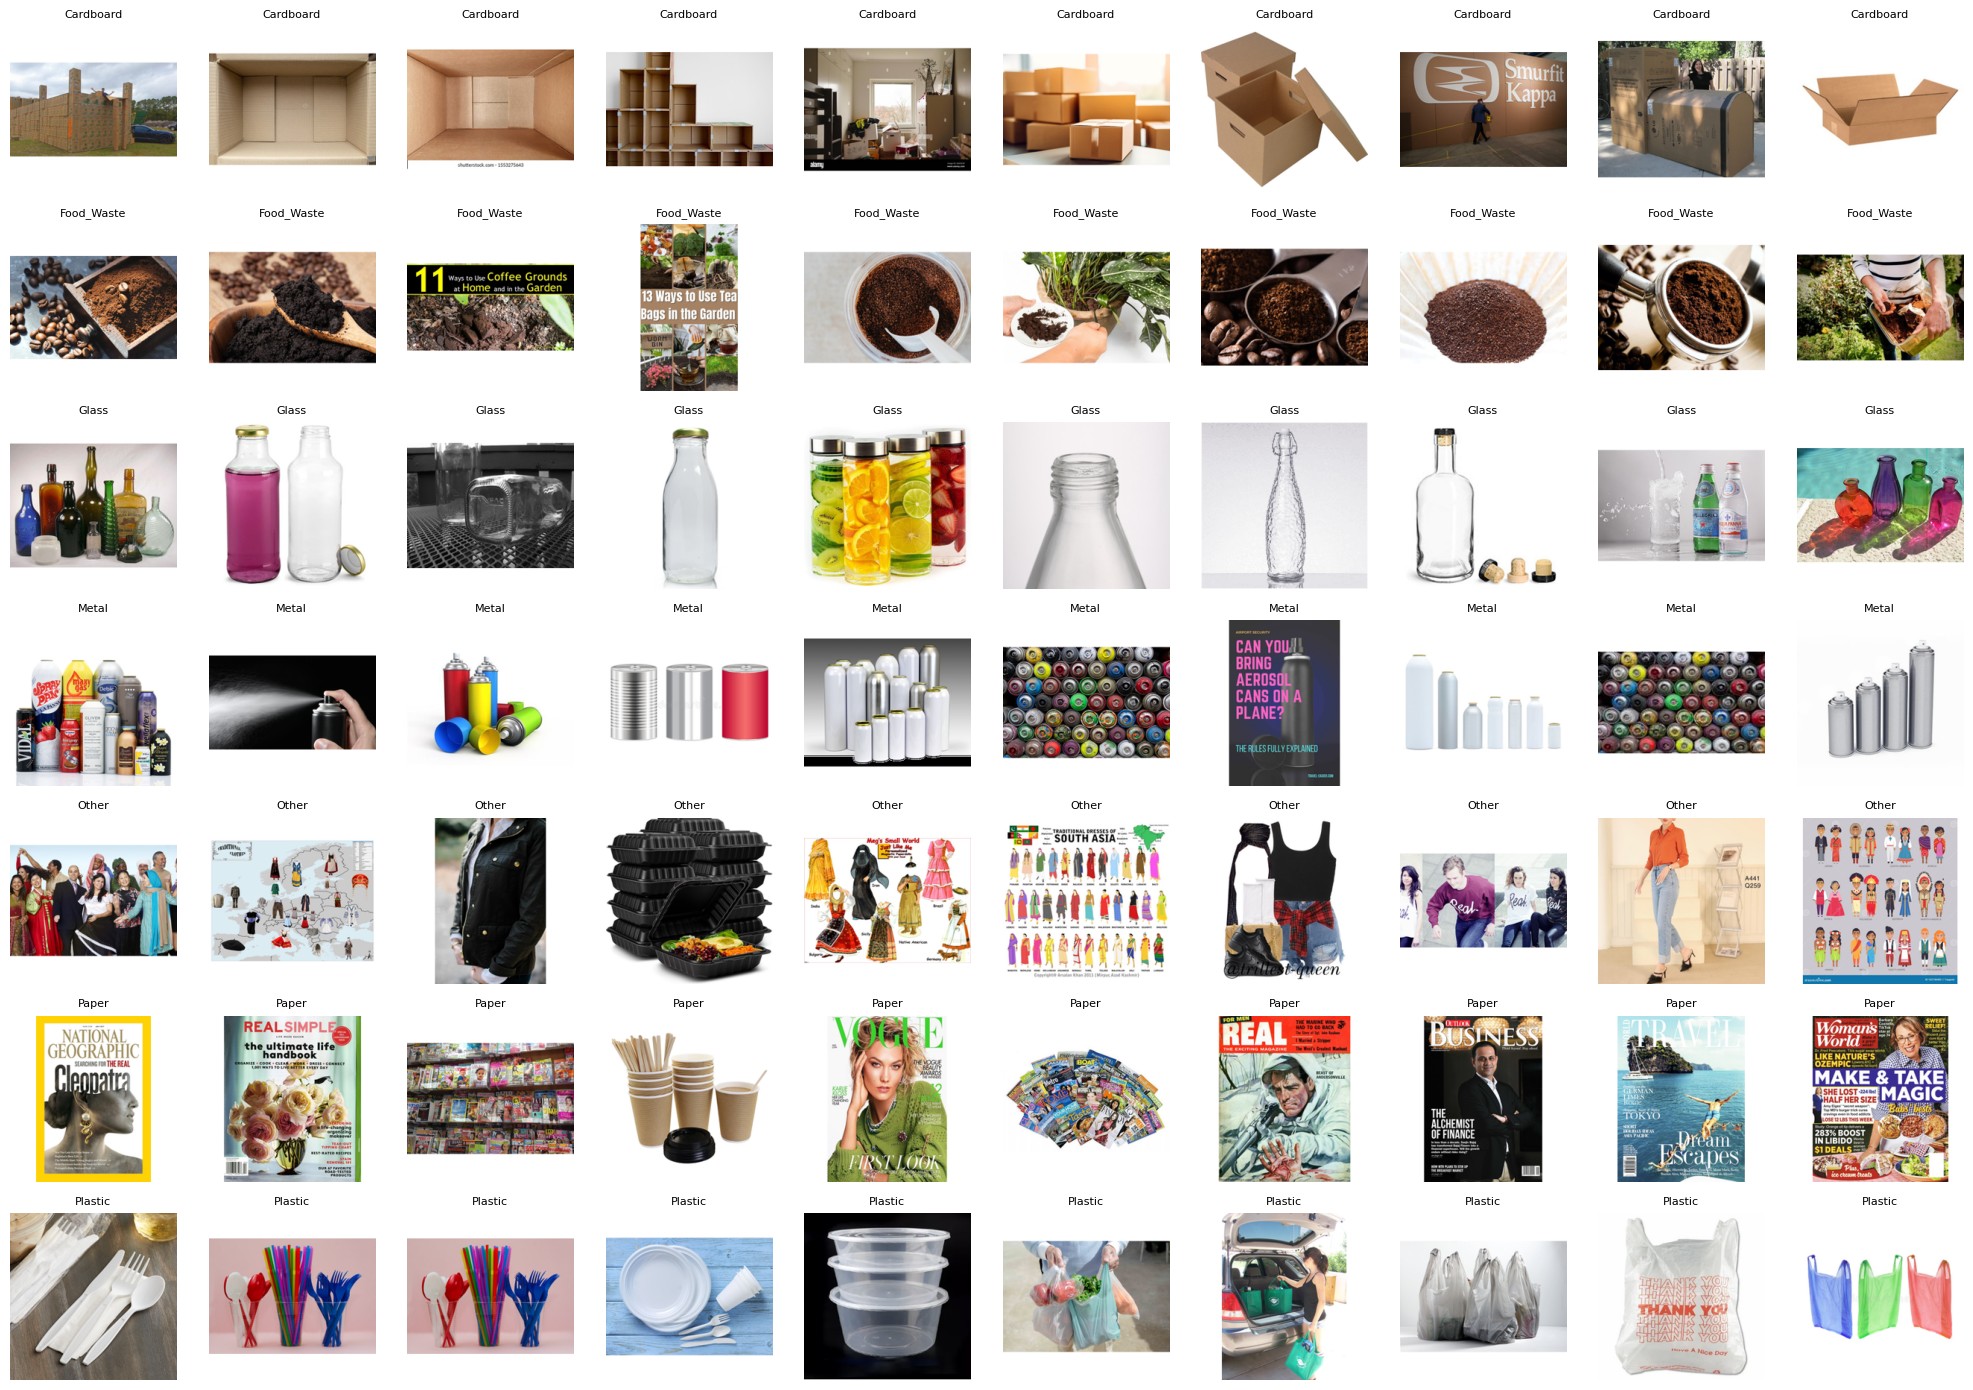

In [287]:
# Visualise Sample Images (across different labels)

def show_sample_images(X, y, class_names, samples_per_class=5):
    plt.figure(figsize=(samples_per_class * 2, len(class_names) * 2))

    for class_idx, class_name in enumerate(class_names):
        class_images = X[y == class_idx]
        for i in range(samples_per_class):
            img_idx = class_idx * samples_per_class + i
            plt.subplot(len(class_names), samples_per_class, img_idx + 1)
            plt.imshow(class_images[i].astype("uint8"))
            plt.title(class_name, fontsize=8)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

show_sample_images(X, y, class_names, samples_per_class=10)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [289]:
# Find the smallest and largest image dimensions from the data set
def find_extreme_image_dimensions(dataset_dir):
    min_width = float('inf')
    min_height = float('inf')
    max_width = 0
    max_height = 0

    for class_folder in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_folder)
        if not os.path.isdir(class_path):
            continue

        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    min_width = min(min_width, width)
                    min_height = min(min_height, height)
                    max_width = max(max_width, width)
                    max_height = max(max_height, height)
            except Exception as e:
                print(f"Skipping file {img_path}: {e}")

    min_size = (min_width, min_height)
    max_size = (max_width, max_height)
    return min_size, max_size

min_dim, max_dim = find_extreme_image_dimensions(dataset_dir)
print(f"Smallest image dimensions: {min_dim}")
print(f"Largest image dimensions: {max_dim}")

Smallest image dimensions: (256, 256)
Largest image dimensions: (256, 256)


In [290]:
# Resize the image dimensions

resized_images = []
target_size=(224, 224)

for img in X:
    pil_img = Image.fromarray(img).convert('RGB')
    pil_img = pil_img.resize(target_size)
    resized_images.append(np.array(pil_img))
    
X_resized = np.array(resized_images)    
print(f"Resized shape: {X_resized.shape}")

Resized shape: (7625, 224, 224, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [294]:
# Encode the labels suitably
from tensorflow.keras.utils import to_categorical

y_encoded = to_categorical(y, num_classes=7)
print(f"y_encoded: {y_encoded}")

y_encoded: [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [297]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y)

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_test)}")

Train set size: 5337
Validation set size: 2288


In [298]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [299]:
X_train.shape

(5337, 224, 224, 3)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [310]:
# Build and compile the model

model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax')) 

In [312]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [314]:
# Print model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [316]:
# Training

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2743 - loss: 2.1907 - val_accuracy: 0.3562 - val_loss: 1.7045
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.3642 - loss: 1.7077 - val_accuracy: 0.3881 - val_loss: 1.6120
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.4392 - loss: 1.5227 - val_accuracy: 0.4733 - val_loss: 1.4662
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.5282 - loss: 1.2950 - val_accuracy: 0.5101 - val_loss: 1.3903
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.6361 - loss: 1.0154 - val_accuracy: 0.5524 - val_loss: 1.3289
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.7475 - loss: 0.7808 - val_accuracy: 0.5695 - val_loss: 1.3494
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.8016 - loss: 0.5873 - val_accuracy: 0.5660 - val_loss: 1.5077
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8492 - loss: 0.4499 - val_accu

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [318]:
# Evaluate on the test set; display suitable metrics

val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Loss: 1.7960
Validation Accuracy: 0.5927


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [319]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [320]:
# Create a function to augment the images

def create_augmented_generator(X, y, batch_size=32):
    
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    return datagen.flow(X, y, batch_size=batch_size)

In [321]:
# Create the augmented training dataset

train_generator = create_augmented_generator(X_train, y_train)
val_generator = ImageDataGenerator(rescale=1./255).flow(X_test, y_test, batch_size=32)

##### **4.1.2**

Train the model on the new augmented dataset.

In [322]:
# Train the model using augmented images

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Users\Star\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.2823 - loss: 2.0866 - val_accuracy: 0.3011 - val_loss: 1.8540
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.2966 - loss: 1.8694 - val_accuracy: 0.3011 - val_loss: 1.8573
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.3003 - loss: 1.8647 - val_accuracy: 0.3011 - val_loss: 1.8578
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.3065 - loss: 1.8508 - val_accuracy: 0.3011 - val_loss: 1.8497
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.3023 - loss: 1.8499 - val_accuracy: 0.3011 - val_loss: 1.8499
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.3003 - loss: 1.8510 - val_accuracy: 0.3011 - val_loss: 1.8493
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.2967 - loss: 1.8520 - val_accuracy: 0.3011 - val_loss: 1.8485
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.3004 - loss: 1.8483 - val_accu

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
  1. Unzipped and loaded a dataset with 7 image classes, each in separate subfolders.
  2. Visualized class distribution with bar plots.
  3. Displayed sample images from different classe
  4. Identified the minimum and maximum image dimensions
  5. Resized all images to a uniform size of 224×224 pixels.
  6. Encoded labels using one-hot encoding for deep learning compatibility.
  7. Split the dataset into training and validation sets with stratification.
  8. Normalized pixel values to [0, 1].
  9. Created a Convolutional Neural Network (CNN) using Keras.Sequential.
  10. Used ReLU activations, dropout for regularization, and a softmax output layer
  11. Compiled the model with categorical cross-entropy and the Adam optimizer.
  12. Defined a function to augment images using ImageDataGenerator
  13. Evaluated the model on the validation set.
  14. Reported loss, accuracy.
  
* Report model training results
  1. Validation Loss: 1.7960
  2. Validation Accuracy:  0.59.27
  3. Training Accuracy: 0.9080
  4. Training Loss: 0.2874